In [1]:
import numpy as np
from sklearn.datasets import images,load_iris

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
iris = load_iris()

In [13]:
type(iris)

sklearn.utils.Bunch

In [16]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [87]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [99]:
sns.set_style('whitegrid')

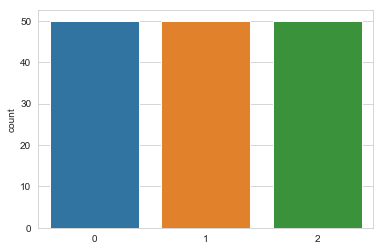

In [100]:
sns.countplot(x='target',data=iris)

Text(0, 0.5, 'sepal width (cm)')

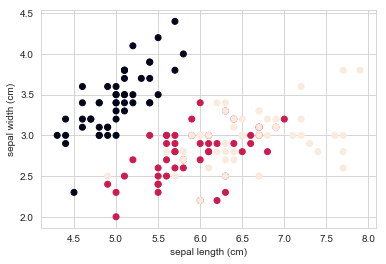

In [101]:
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [102]:
def plot(i,j):
    plt.scatter(iris.data[:,i],iris.data[:,j],c=iris.target)
    plt.xlabel(iris.feature_names[i])
    plt.ylabel(iris.feature_names[j])

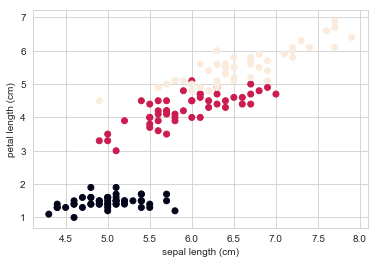

In [103]:
plot(0,2)

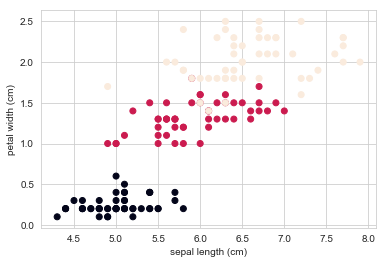

In [104]:
plot(0,3)

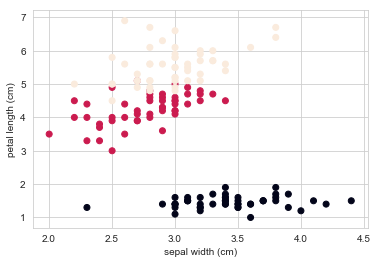

In [105]:
plot(1,2)

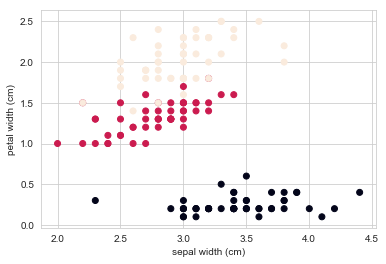

In [106]:
plot(1,3)

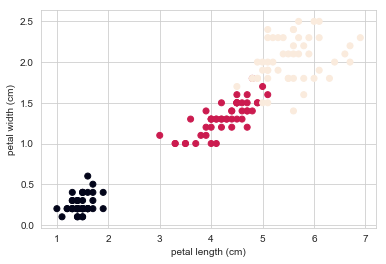

In [107]:
plot(2,3)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=101,test_size=0.25)

In [111]:
print("Details of Train & Test Data : ")
print("===================================")
print("Shape of X_train : ",X_train.shape)
print("===================================")
print("Shape of X_test : ",X_test.shape)
print("===================================")
print("Shape of y_train : ",y_train.shape)
print("===================================")
print("Shape of y_test : ",y_test.shape)
print("===================================")

Details of Train & Test Data : 
Shape of X_train :  (112, 4)
Shape of X_test :  (38, 4)
Shape of y_train :  (112,)
Shape of y_test :  (38,)


<h3 style="text-align:center">---------------------------------------------------------------------<br><br>KNeighborsClassifier<br><br>---------------------------------------------------------------------</h3>

In [112]:
test_score = []
train_score = []
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    
    print("\nModel Score for n_neighbors :%d\n==============================="%(i))
    print("Train Score : %.3f %%"%(clf.score(X_train,y_train) * 100))
    print("Test Score : %.3f %%"%(clf.score(X_test,y_test) * 100))
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))


Model Score for n_neighbors :1
Train Score : 100.000 %
Test Score : 100.000 %

Model Score for n_neighbors :2
Train Score : 96.429 %
Test Score : 94.737 %

Model Score for n_neighbors :3
Train Score : 95.536 %
Test Score : 100.000 %

Model Score for n_neighbors :4
Train Score : 96.429 %
Test Score : 94.737 %

Model Score for n_neighbors :5
Train Score : 96.429 %
Test Score : 100.000 %

Model Score for n_neighbors :6
Train Score : 95.536 %
Test Score : 100.000 %

Model Score for n_neighbors :7
Train Score : 96.429 %
Test Score : 100.000 %

Model Score for n_neighbors :8
Train Score : 95.536 %
Test Score : 94.737 %

Model Score for n_neighbors :9
Train Score : 95.536 %
Test Score : 97.368 %

Model Score for n_neighbors :10
Train Score : 95.536 %
Test Score : 97.368 %

Model Score for n_neighbors :11
Train Score : 95.536 %
Test Score : 100.000 %

Model Score for n_neighbors :12
Train Score : 95.536 %
Test Score : 97.368 %

Model Score for n_neighbors :13
Train Score : 94.643 %
Test Score

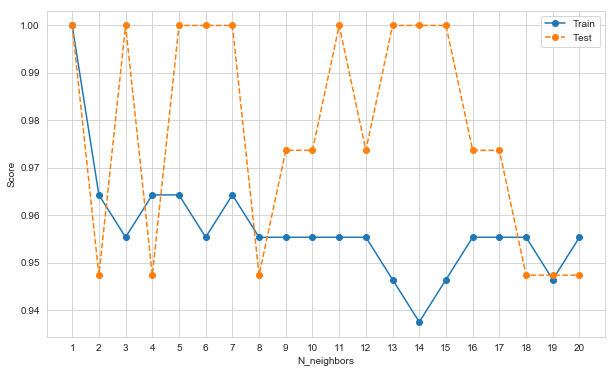

In [113]:
plt.figure(figsize=(10,6))

plt.plot(list(range(1,21)) , train_score , 'o-',label='Train')
plt.plot(list(range(1,21)) , test_score , 'o--',label='Test')
plt.xticks(list(range(1,21)))
plt.xlabel("N_neighbors")
plt.ylabel("Score")
plt.legend()

In [115]:
prediction = clf.predict(X_test)

In [119]:
error = prediction == y_test

In [120]:
np.mean(error)

0.9473684210526315

In [123]:
clf.predict_proba(X_test[0].reshape(1,4))

array([[1., 0., 0.]])

In [124]:
y_test[0]

0

In [126]:
clf.predict_proba(X_test[7:15])

array([[0.  , 0.95, 0.05],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ],
       [0.  , 0.15, 0.85],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.55, 0.45]])

In [130]:
clf.predict(X_test[14].reshape(1,4))

array([1])

In [131]:
clf.predict_proba(X_test[14].reshape(1,4))

array([[0.  , 0.55, 0.45]])

In [132]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [133]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')